Import libraries                               
Load dataset                          
Ask Six Questions                         
EDA                                   
Tain Test Split                                 
Training Models                                
selecting model                                
using streamlit                             

In [2]:
import numpy as np
import pandas as pd

In [3]:
concrete = pd.read_excel('Concrete_Data.xls')

In [4]:
concrete.head()

,Cement,Water,Day,Strength
0,540.0,162.0,28,79.986111
1,540.0,162.0,28,61.887366
2,332.5,228.0,270,40.269535
3,332.5,228.0,365,41.052780
4,198.6,192.0,360,44.296075


In [5]:
concrete.shape

(1030, 4)

In [6]:
concrete.isnull().sum()

Cement      0
Water       0
Day         0
Strength    0
dtype: int64

In [7]:
concrete.duplicated().sum()

28

In [8]:
concrete.drop_duplicates(inplace=True)

In [9]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 0 to 1029
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cement    1002 non-null   float64
 1   Water     1002 non-null   float64
 2   Day       1002 non-null   int64  
 3   Strength  1002 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 39.1 KB


In [10]:
concrete.describe()

,Cement,Water,Day,Strength
count,1002.000000,1002.000000,1002.000000,1002.000000
mean,278.231737,182.109531,45.935130,35.254442
std,104.161372,21.346235,63.810712,16.289568
min,102.000000,121.750000,1.000000,2.331808
25%,190.680000,166.610000,7.000000,23.523715
50%,263.250000,185.700000,28.000000,33.780187
75%,342.000000,192.940000,56.000000,44.867306
max,540.000000,247.000000,365.000000,82.599225


In [11]:
concrete.corr()

,Cement,Water,Day,Strength
Cement,1.000000,-0.053703,0.087927,0.489553
Water,-0.053703,1.000000,0.279419,-0.268470
Day,0.087927,0.279419,1.000000,0.337286
Strength,0.489553,-0.268470,0.337286,1.000000


# EDA

In [12]:
concrete.head()

,Cement,Water,Day,Strength
0,540.0,162.0,28,79.986111
1,540.0,162.0,28,61.887366
2,332.5,228.0,270,40.269535
3,332.5,228.0,365,41.052780
4,198.6,192.0,360,44.296075


In [13]:
import seaborn as sns

In [15]:
concrete['Day'].value_counts()

28     417
3      128
7      122
56      86
14      62
90      54
100     52
180     26
91      17
365     14
270     13
360      6
120      3
1        2
Name: Day, dtype: int64

<AxesSubplot:xlabel='Day', ylabel='count'>

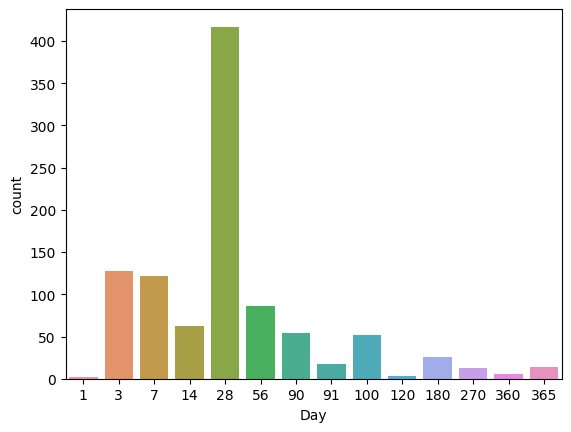

In [17]:
sns.countplot(x= concrete['Day'])

C:\Users\Noor Saeed\AppData\Local\Temp\ipykernel_1284\3301731006.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(concrete['Strength'])


<AxesSubplot:xlabel='Strength', ylabel='Density'>

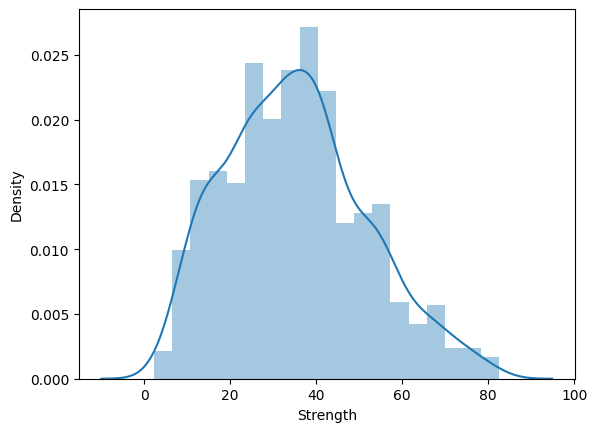

In [18]:
sns.distplot(concrete['Strength'])

# train test split

In [19]:
X = concrete.drop("Day",axis=1)
y = concrete['Day']

In [20]:
X.shape

(1002, 3)

In [21]:
y.shape

(1002,)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# training models

In [25]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error,r2_score

In [26]:
models = {
    "lr":LinearRegression(),
    "lss":Lasso(),
    "Rid":Ridge(),
    "dtr":DecisionTreeRegressor(),
    "rfr":RandomForestClassifier()
}

for name, mod in models.items():
    mod.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    
    print(f"{name} ==== mse : {mean_squared_error(y_test,y_pred)}  r2_score  : {r2_score(y_test,y_pred)}")

lr ==== mse : 2136.6748712636822  r2_score  : 0.1590533778474681
lss ==== mse : 2134.6817577969564  r2_score  : 0.15983782196667018
Rid ==== mse : 2136.670837232631  r2_score  : 0.15905496555031962
dtr ==== mse : 3585.218905472637  r2_score  : -0.4110606011159197
rfr ==== mse : 1758.955223880597  r2_score  : 0.3077152383202266


In [27]:
rfr = RandomForestClassifier()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

In [28]:
import pickle
pickle.dump(rfr,open('model.pkl','wb'))